In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv("HistoricalQuotes (3).csv")
df.head()

,date,close,volume,open,high,low
0,16:00,111.71,"22,634,641",110.980,111.955,110.220
1,2018/09/04,111.71,22558040.0000,110.850,111.955,110.220
2,2018/08/31,112.33,23217310.0000,111.685,112.777,111.515
3,2018/08/30,111.95,22759640.0000,111.670,112.610,111.440
4,2018/08/29,112.02,20747500.0000,110.450,112.030,110.270


In [19]:
print(df.head())

         date   close         volume     open     high      low
0       16:00  111.71     22,634,641  110.980  111.955  110.220
1  2018/09/04  111.71  22558040.0000  110.850  111.955  110.220
2  2018/08/31  112.33  23217310.0000  111.685  112.777  111.515
3  2018/08/30  111.95  22759640.0000  111.670  112.610  111.440
4  2018/08/29  112.02  20747500.0000  110.450  112.030  110.270


In [20]:
print(df.shape)

(2519, 6)


In [21]:
print(df.columns)

Index(['date', 'close', 'volume', 'open', 'high', 'low'], dtype='object')


In [22]:
df.describe()

,close,open,high,low
count,2519.000000,2519.000000,2519.000000,2519.000000
mean,42.810015,42.791456,43.170949,42.408652
std,21.373791,21.366697,21.500946,21.219928
min,15.150000,15.200000,15.620000,14.870000
25%,26.940000,26.885000,27.190000,26.650000
50%,34.490000,34.420000,34.790000,34.250000
75%,52.810000,52.670000,53.190000,52.152500
max,112.330000,111.685000,112.777000,111.515000


In [23]:
df.isnull().sum()

date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64

In [24]:
df.duplicated().sum() 
df.drop_duplicates(inplace = True)  

In [25]:
import pandas as pd

# Ensure all necessary columns are present in df
print(df.columns)

# Create a new DataFrame with specified columns, ensuring the column names match exactly
tbl = pd.DataFrame(df, columns=['date', 'open', 'high', 'low', 'close'])

# Change the column names to preferred names
tbl.columns = ['Date', 'Open', 'High', 'Low', 'Close']

# Set display options to show all rows
pd.set_option('display.max_rows', tbl.shape[0] + 1)

# Convert the 'Date' column to datetime, specifying the format to avoid parsing errors
tbl['Date'] = pd.to_datetime(tbl['Date'], format='%Y/%m/%d', errors='coerce')

# Filter out any rows where 'Date' could not be converted (resulting in NaT)
tbl = tbl[pd.notnull(tbl['Date'])]

# Arrange the data by date in descending order
tbl = tbl.sort_values(['Date'], ascending=False)

# Display the first few rows to verify everything is correct
print(tbl.head())

# Print the data types to confirm the 'Date' conversion
print(tbl.dtypes)

Index(['date', 'close', 'volume', 'open', 'high', 'low'], dtype='object')
        Date     Open     High      Low   Close
1 2018-09-04  110.850  111.955  110.220  111.71
2 2018-08-31  111.685  112.777  111.515  112.33
3 2018-08-30  111.670  112.610  111.440  111.95
4 2018-08-29  110.450  112.030  110.270  112.02
5 2018-08-28  109.940  110.500  109.790  110.26
Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object


In [26]:
print(tbl.head(5))

        Date     Open     High      Low   Close
1 2018-09-04  110.850  111.955  110.220  111.71
2 2018-08-31  111.685  112.777  111.515  112.33
3 2018-08-30  111.670  112.610  111.440  111.95
4 2018-08-29  110.450  112.030  110.270  112.02
5 2018-08-28  109.940  110.500  109.790  110.26


In [27]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 1 to 2518
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   Open    2518 non-null   float64       
 2   High    2518 non-null   float64       
 3   Low     2518 non-null   float64       
 4   Close   2518 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 118.0 KB


In [28]:
tbl.describe()

,Date,Open,High,Low,Close
count,2518,2518.000000,2518.000000,2518.000000,2518.000000
mean,2013-09-03 09:01:34.360603648,42.764376,43.143632,42.381721,42.782652
min,2008-09-04 00:00:00,15.200000,15.620000,14.870000,15.150000
25%,2011-03-04 18:00:00,26.882500,27.190000,26.650000,26.940000
50%,2013-09-04 12:00:00,34.415000,34.785000,34.195000,34.470000
75%,2016-03-06 06:00:00,52.630000,53.092500,52.137500,52.747500
max,2018-09-04 00:00:00,111.685000,112.777000,111.515000,112.330000
std,NaN,21.327660,21.461451,21.181043,21.333862


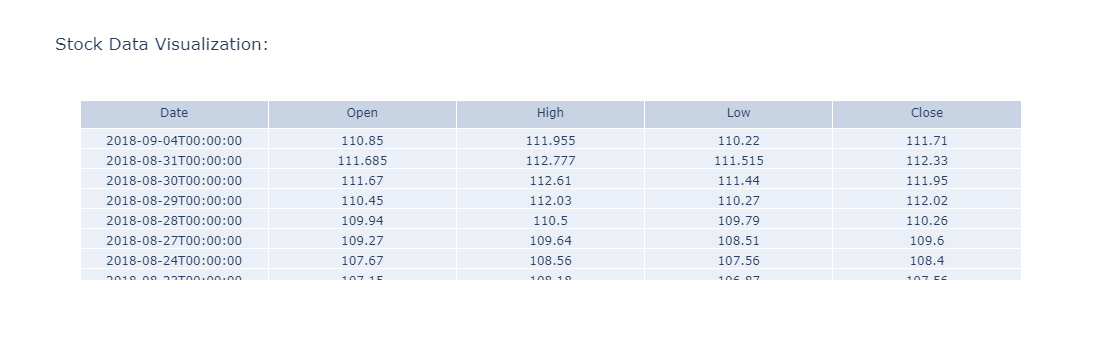

In [29]:
import plotly.graph_objects as go

# Define table labels excluding 'Last'
labels = ['Date', 'Open', 'High', 'Low', 'Close']

# Create a Plotly table figure without 'Last'
fig = go.Figure(data=[go.Table(
    header=dict(values=labels),
    cells=dict(values=[tbl.Date, tbl.Open, tbl.High, tbl.Low, tbl.Close])
)])
fig.update_layout(
    title='Stock Data Visualization:'
)
fig.show()

Text(0.5, 1.0, 'Relationship of Closing and Opening price')

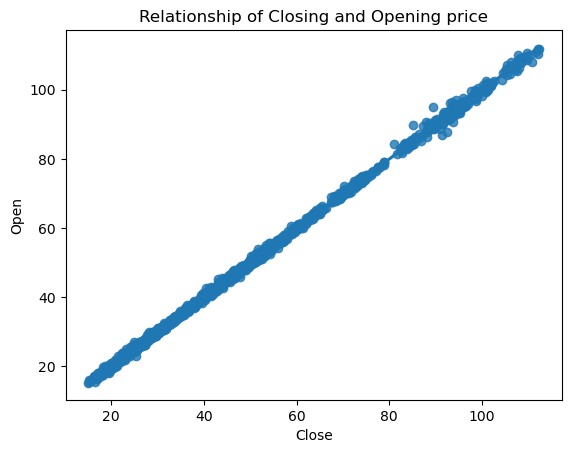

In [30]:
sns.regplot(x = tbl[['Close']], y = tbl[['Open']], data= tbl)
plt.title("Relationship of Closing and Opening price")

Text(0.5, 1.0, 'Relationship of Closing and High price')

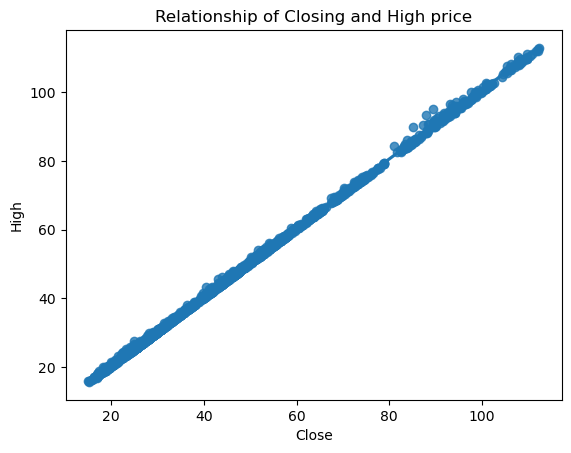

In [31]:
sns.regplot(x = tbl[['Close']], y = tbl[['High']], data= tbl)
plt.title("Relationship of Closing and High price")

Text(0.5, 1.0, 'Relationship of Closing and Low price')

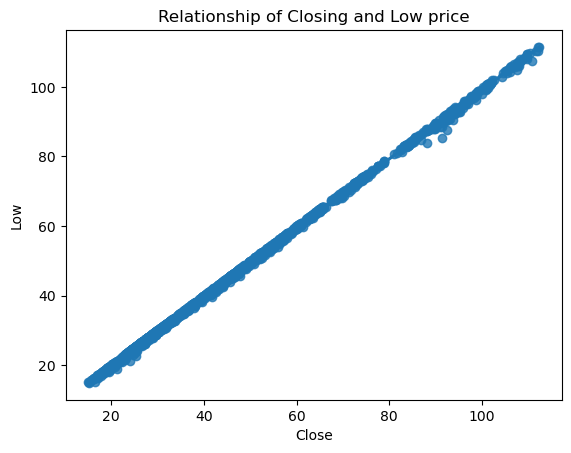

In [32]:
sns.regplot(x = tbl[['Close']], y = tbl[['Low']], data= tbl)
plt.title("Relationship of Closing and Low price")

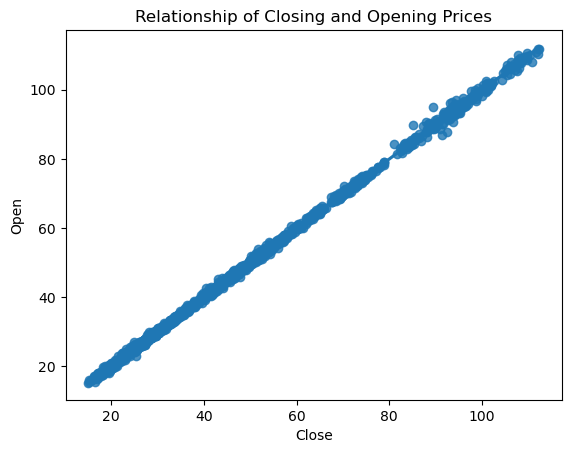

In [33]:
sns.regplot(x='Close', y='Open', data=tbl)
plt.title("Relationship of Closing and Opening Prices")
plt.show()


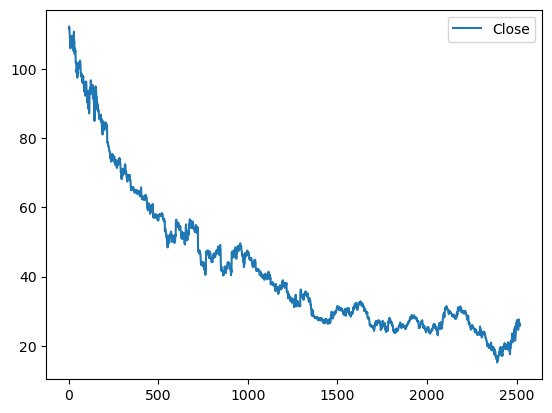

In [34]:
tbl[['Close']].plot()
plt.show()

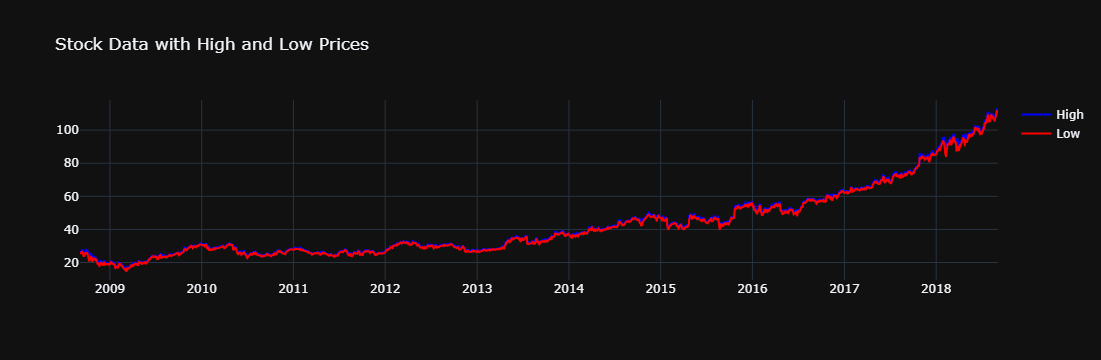

In [35]:
fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=tbl.Date, y=tbl['High'], mode='lines', name='High', marker=dict(color="blue")))
fig1.add_trace(go.Scatter(x=tbl.Date, y=tbl['Low'], mode='lines', name='Low', marker=dict(color="red")))

fig1.update_layout(title='Stock Data with High and Low Prices', template='plotly_dark')

fig1.show()

In [36]:
y = df[['close']] 
x = df[['open', 'high', 'low']]

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state  = 0)


In [38]:
x_train.shape

(2015, 3)

In [39]:
x_test.shape

(504, 3)

In [40]:
model = LinearRegression()

# Train the Linear Regression Model
model.fit(x_train, y_train)

print('Intercept: ' ,  model.intercept_)
print('coefficient : ' ,  model.coef_)

Intercept:  [-0.02071839]
coefficient :  [[-0.58797053  0.80974553  0.77897349]]


In [41]:
preds = model.predict(x_test)


In [42]:
from sklearn.metrics import r2_score

# Evaluate the model's accuracy
accuracy = r2_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.9998844909883424


In [43]:
mean_squared_error(y_test, preds )

0.05159041499501125

Text(0.5, 0, 'yhat')

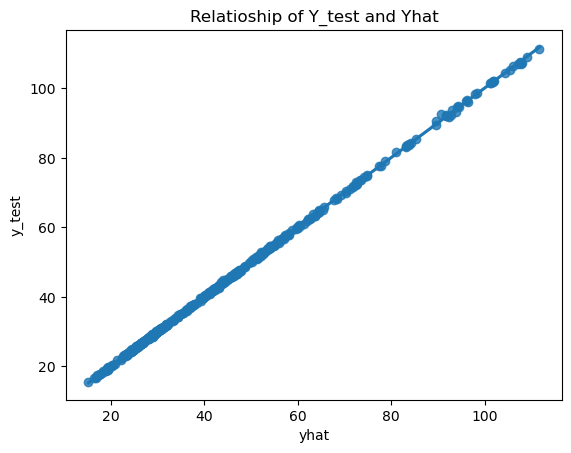

In [44]:
sns.regplot( x = y_test, y = preds , data = df)
plt.title('Relatioship of Y_test and Yhat')
plt.ylabel('y_test')
plt.xlabel('yhat')

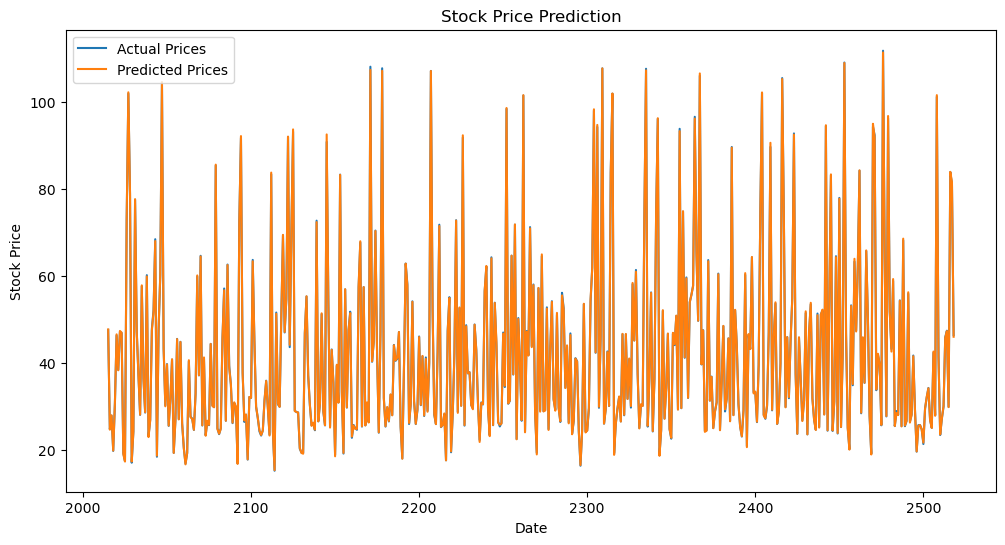

In [45]:
plt.figure(figsize=(12, 6))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(df.index[-len(y_test):], preds, label='Predicted Prices')
plt.legend()
plt.show()